# Apprentice Chef - Classification Modeling Case Study

## Name   : Mohammad Asad Pervez
## Cohort : 4

### Objective

Apprentice Chef, Inc.has launched 'Halfway There', a cross-selling promotion where subscribers receive a half bottle of wine from a local California vineyard every Wednesday. They Want to know which customers will subscribe to this service.


--------------------------------------------------------------------------------------------------------------------------

We start by exploring the data provided by the company

In [134]:
#importing the necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.neural_network import MLPClassifier

In [135]:
#uploading the file

file = 'Apprentice_Chef_Dataset.xlsx'

dt = pd.read_excel(file)

dt.head()


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


In [136]:
dt['CROSS_SELL_SUCCESS'].value_counts()

1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64

--------------------------------------------------------------------------------------------------------------------------

There seems to be some insights we can drive by categorizing the emails. 
We start by splitting and then categorizing the emails.
Then we start exploring them.

--------------------------------------------------------------------------------------------------------------------------

In [137]:
#splitting emails

email_list = []

for index, col in dt.iterrows():
    
    # splitting email domain at '@'
    split_email = dt.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    email_list.append(split_email)
    

# converting placeholder_lst into a DataFrame 
domains = pd.DataFrame(email_list)

domains.columns = ['email_name', 'personal_email_domain']

# concatenating personal_email_domain with friends DataFrame
dt = pd.concat([dt, domains.loc[: , 'personal_email_domain']],
                   axis = 1)


dt.head()

    

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,personal_email_domain
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,1,0,90,165.8,6,1,3,11,0,passport.com
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,1,0,90,150.5,4,1,3,13,90,jnj.com
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,80,99.6,3,0,3,12,0,gmail.com
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,0,0,90,125.0,3,0,3,13,0,ibm.com
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,1,0,90,135.3,3,1,3,13,253,goldmansacs.com


In [138]:
#Counting the number of emails
dt.loc[: ,'personal_email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
jnj.com              28
cocacola.com         28
merck.com            28
nike.com             27
apple.com            27
ibm.com              26
dupont.com           26
ge.org               26
microsoft.com        25
chevron.com          25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
caterpillar.com      22
pg.com               22
verizon.com          22
mmm.com              22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
intel.com            17
homedepot.com        17
Name: personal_email_domain, dtype: int64

In [139]:
#making lists of email groups

professional_email_domains = ['@mmm.com',
                                '@amex.com',
                                '@apple.com',
                                '@boeing.com',
                                '@caterpillar.com',
                                '@chevron.com',
                                '@cisco.com',
                                '@cocacola.com',
                                '@disney.com',
                                '@dupont.com',
                                '@exxon.com',
                                '@ge.org',
                                '@goldmansacs.com',
                                '@homedepot.com',
                                '@ibm.com',
                                '@intel.com',
                                '@jnj.com',
                                '@jpmorgan.com',
                                '@mcdonalds.com',
                                '@merck.com',
                                '@microsoft.com',
                                '@nike.com',
                                '@pfizer.com',
                                '@pg.com',
                                '@travelers.com',
                                '@unitedtech.com',
                                '@unitedhealth.com',
                                '@verizon.com',
                                '@visa.com',
                                '@walmart.com']

personal_email_domains = ['@gmail.com',
                            '@yahoo.com',
                            '@protonmail.com']

junk_email_domains = ['@me.com',
                        '@aol.com',
                        '@hotmail.com',
                        '@live.com',
                        '@msn.com',
                        '@passport.com']

#grouping_emails
email_groups = []

for i in dt.loc[ : , 'personal_email_domain']:
    if '@' + i in professional_email_domains:
        email_groups.append('professional')
    
    elif '@' + i in personal_email_domains:
        email_groups.append ('personal')
    
    elif '@' + i in junk_email_domains:
        email_groups.append ('junk')
    
    else:
        email_groups.append('unknown')
        
dt['email_groups'] = pd.Series(email_groups)

#Saving New Dataset to Excel
dt.to_excel('Apprentice_ND.xlsx')

In [140]:

chef = pd.read_excel('Apprentice_ND.xlsx')
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 32 columns):
Unnamed: 0                      1946 non-null int64
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
P

In [141]:
#one hot encoding email values

one_hot_email = pd.get_dummies(chef['email_groups'])

chef = chef.join([one_hot_email])

-------------------------------------------------------------------------------------------------------------------------

Now that we have all our columns, we dive deeper into feature engineering. We first start by plotting frequency 
distribution of the features to identify outliers. Then we use the outliers and flag them with new columns.

-------------------------------------------------------------------------------------------------------------------------

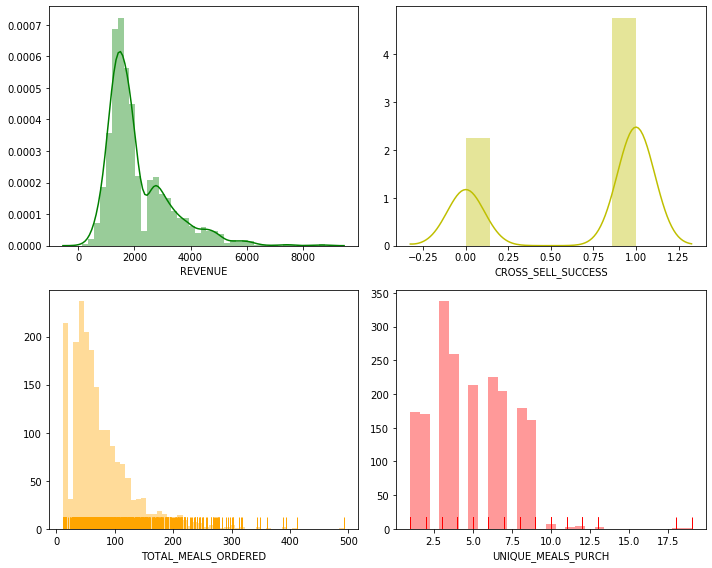

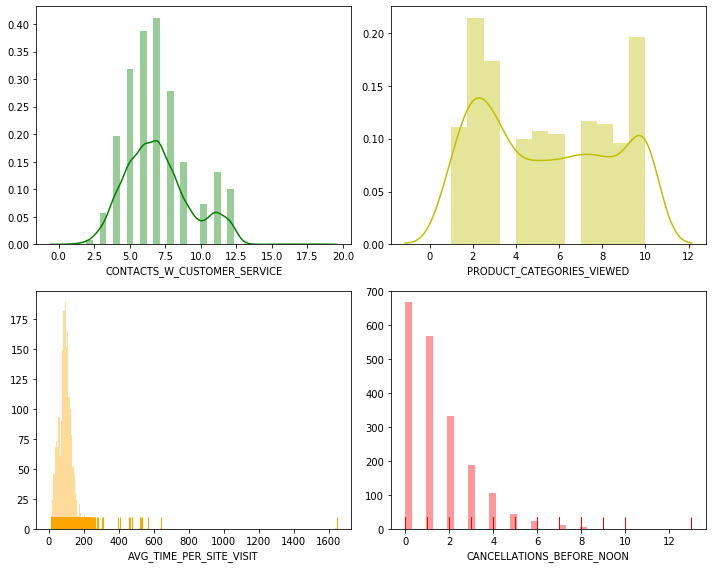

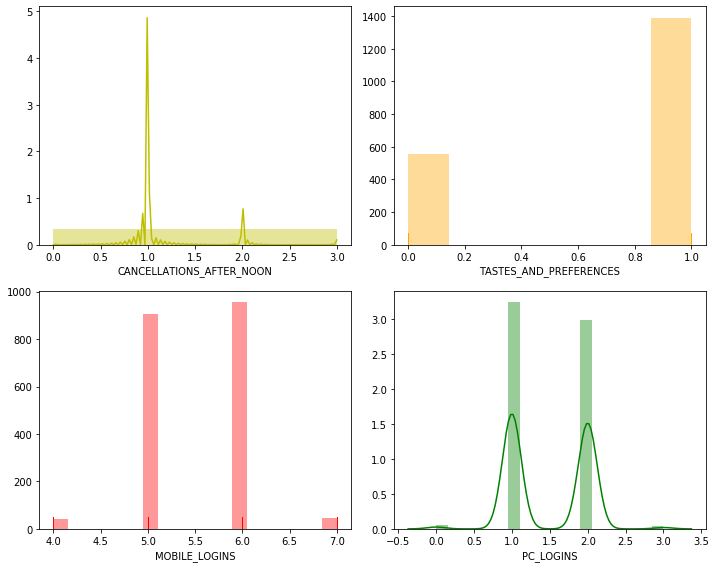

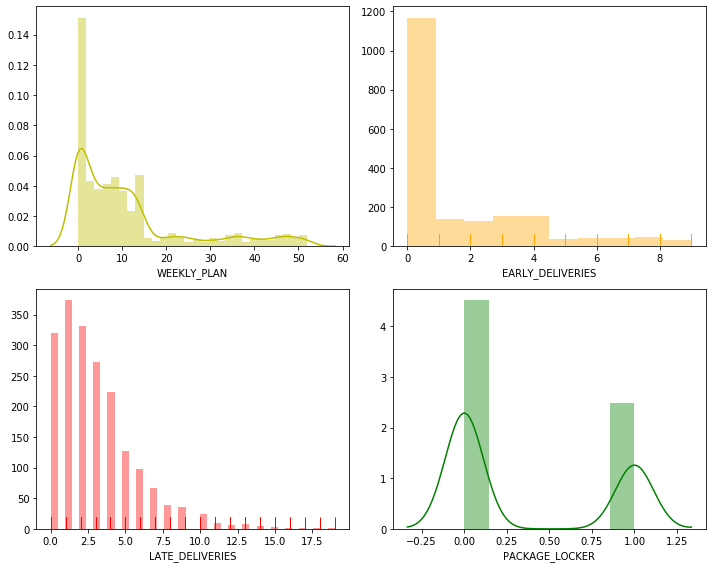

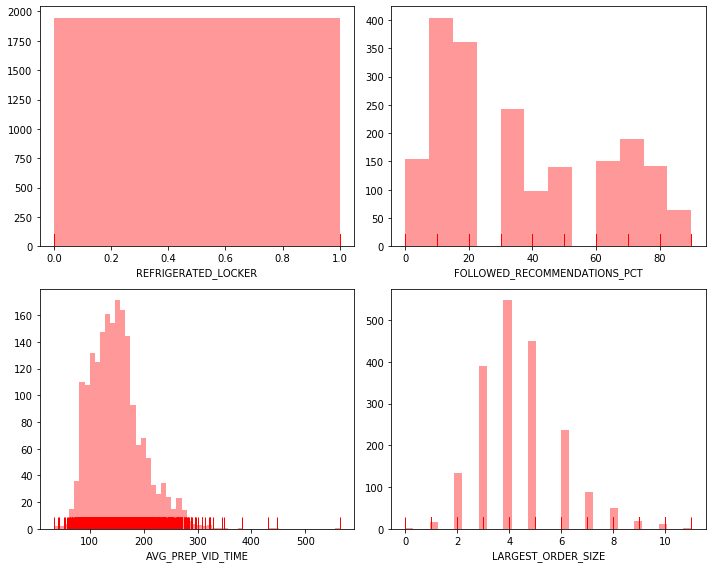

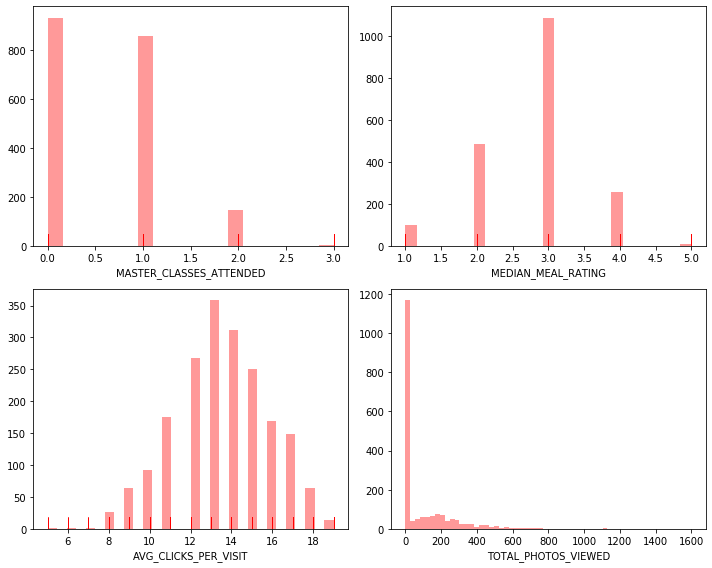

In [142]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('UNIQUE_MEALS_PURCH')
plt.tight_layout()
plt.savefig('CHEF Data Histograms 1 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Chef Data Histograms 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Chef Data Histograms 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.savefig('Chef Data Histograms 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Chef Data Histograms 5 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = False,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.savefig('Chef Data Histograms 6 of 6.png')
# setting outlier thresholdsplt.show()

In [143]:
# setting outlier thresholds

REVENUE_split = 2400 
TOTAL_MEALS_ORDERED_split =200
UNIQUE_MEALS_PURCH_split = 10.0
CONTACTS_W_CUSTOMER_SERVICE_split = 10.0
AVG_TIME_PER_SITE_VISIT_split = 200
CANCELLATIONS_BEFORE_NOON_split = 5
CANCELLATIONS_AFTER_NOON_split_low = 0.5
CANCELLATIONS_AFTER_NOON_split_high = 1.5
MOBILE_LOGINS_split_low = 4.9
MOBILE_LOGINS_split_high = 6.1
PC_LOGINS_split_low = 0.5
PC_LOGINS_split_high = 2.4
WEEKLY_PLAN_split_low = 0
WEEKLY_PLAN_split_high = 17
EARLY_DELIVERIES_split = 1
LATE_DELIVERIES_split = 10
PACKAGE_LOCKER_split_low = 0.0
PACKAGE_LOCKER_split_high = 1.0
AVG_PREP_VID_TIME_split = 250
LARGEST_ORDER_SIZE_split_low = 2 
LARGEST_ORDER_SIZE_split_high = 7
MASTER_CLASSES_ATTENDED_split = 2
MEDIAN_MEAL_RATING_split = 4
AVG_CLICKS_PER_VISIT_split_low = 8
TOTAL_PHOTOS_VIEWED_split_low = 0
TOTAL_PHOTOS_VIEWED_split_high = 400

In [144]:
##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

#Revenue
chef['out_revenue'] = 0

revenue_condition_split = chef.loc[: , 'out_revenue'][chef['REVENUE']>REVENUE_split]
chef['out_revenue'].replace(to_replace = revenue_condition_split,
                            value = 1,
                           inplace = True)

#Total meals ordered
chef['out_meals_ordered'] = 0

total_meals_ordered_hi_split = chef.loc[: ,'out_meals_ordered'][chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_split]
chef['out_meals_ordered'].replace(to_replace = total_meals_ordered_hi_split,
                                   value = 1,
                                    inplace = True)

#Unique Meals
chef['out_unique_meals'] = 0

unique_meals_condition = chef.loc[: , 'out_unique_meals'][chef['UNIQUE_MEALS_PURCH'] >= UNIQUE_MEALS_PURCH_split]
chef['out_unique_meals'].replace(to_replace = unique_meals_condition,
                                value = 1,
                                inplace = True)

#Contact with Customer Service
chef['out_customer_service_contact'] = 0

customer_service_contact_condition = chef.loc[: , 'out_customer_service_contact'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_split]

chef['out_customer_service_contact'].replace(to_replace = customer_service_contact_condition,
                                value = 1,
                                inplace = True)

#Avg time on site
AVG_TIME_PER_SITE_VISIT_split = 200

chef['out_avg_time_site_visit'] = 0
avg_time_condition_split = chef.loc[: , 'out_avg_time_site_visit'][chef['AVG_TIME_PER_SITE_VISIT']>AVG_TIME_PER_SITE_VISIT_split]
chef['out_avg_time_site_visit'].replace(to_replace = avg_time_condition_split,
                            value = 1,
                           inplace = True)


#cancellations before noon
CANCELLATIONS_BEFORE_NOON_split = 5

chef['out_canc_before_noon'] = 0

out_canc_condition_split = chef.loc[: , 'out_canc_before_noon'][chef['CANCELLATIONS_BEFORE_NOON']>CANCELLATIONS_BEFORE_NOON_split]
chef['out_canc_before_noon'].replace(to_replace = out_canc_condition_split,
                            value = 1,
                           inplace = True)

#cancellation after noon
CANCELLATIONS_AFTER_NOON_split_low = 0.5
CANCELLATIONS_AFTER_NOON_split_high = 1.5

chef['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_split_high]
condition_lo = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_split_low]

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



#mobile logins
MOBILE_LOGINS_split_low = 4.9
MOBILE_LOGINS_split_high = 6.1

chef['out_MOBILE_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] > MOBILE_LOGINS_split_high]
condition_lo = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] < MOBILE_LOGINS_split_low]

chef['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#PC logins
PC_LOGINS_split_low = 0.5
PC_LOGINS_split_high = 2.4

chef['out_PC_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_PC_LOGINS'][chef['PC_LOGINS'] > PC_LOGINS_split_high]
condition_lo = chef.loc[0:,'out_PC_LOGINS'][chef['PC_LOGINS'] < PC_LOGINS_split_low]

chef['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#weekly plasn
WEEKLY_PLAN_split_low = 0
WEEKLY_PLAN_split_high = 17

chef['out_WEEKLY_PLAN'] = 0
condition_hi = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_split_high]
condition_lo = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == WEEKLY_PLAN_split_low]

chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_WEEKLY_PLAN'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#early deliveries
EARLY_DELIVERIES_split = 1
chef['out_EARLY_DELIVERIES'] = 0

EARLY_DELIVERIES_split_condition_split = chef.loc[: , 'out_EARLY_DELIVERIES'][chef['EARLY_DELIVERIES']<EARLY_DELIVERIES_split]
chef['out_EARLY_DELIVERIES'].replace(to_replace = EARLY_DELIVERIES_split_condition_split,
                            value = 1,
                           inplace = True)

#late deliveries
LATE_DELIVERIES_split = 10
chef['out_LATE_DELIVERIES'] = 0

LATE_DELIVERIES_condition_split = chef.loc[: , 'out_LATE_DELIVERIES'][chef['LATE_DELIVERIES']>LATE_DELIVERIES_split]
chef['out_LATE_DELIVERIES'].replace(to_replace = LATE_DELIVERIES_condition_split,
                            value = 1,
                           inplace = True)

#package locker
PACKAGE_LOCKER_split_low = 0.0
PACKAGE_LOCKER_split_high = 1.0

chef['out_PACKAGE_LOCKER'] = 0
condition_hi = chef.loc[0:,'out_PACKAGE_LOCKER'][chef['PACKAGE_LOCKER'] > PACKAGE_LOCKER_split_high]
condition_lo = chef.loc[0:,'out_PACKAGE_LOCKER'][chef['PACKAGE_LOCKER'] < PACKAGE_LOCKER_split_low]

chef['out_PACKAGE_LOCKER'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_PACKAGE_LOCKER'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


#average video time
AVG_PREP_VID_TIME_split = 250
chef['out_AVG_PREP_VID_TIME'] = 0

AVG_PREP_VID_TIME_condition_split = chef.loc[: , 'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME']>AVG_PREP_VID_TIME_split]
chef['out_AVG_PREP_VID_TIME'].replace(to_replace = AVG_PREP_VID_TIME_condition_split,
                            value = 1,
                           inplace = True)

#largest orrder size
LARGEST_ORDER_SIZE_split_low = 2 
LARGEST_ORDER_SIZE_split_high = 7

chef['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_split_high]
condition_lo = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_split_low]

chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#master classes attended
MASTER_CLASSES_ATTENDED_split = 2
chef['out_MASTER_CLASSES_ATTENDED'] = 0

MASTER_CLASSES_ATTENDED_condition_split = chef.loc[: , 'out_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED']>MASTER_CLASSES_ATTENDED_split]
chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = revenue_condition_split,
                            value = 1,
                           inplace = True)

#median meal rating
MEDIAN_MEAL_RATING_split = 4
chef['out_MEDIAN_MEAL_RATING'] = 0

MEDIAN_MEAL_RATING_condition_split = chef.loc[: , 'out_MEDIAN_MEAL_RATING'][chef['MEDIAN_MEAL_RATING']>MEDIAN_MEAL_RATING_split]
chef['out_MEDIAN_MEAL_RATING'].replace(to_replace = MEDIAN_MEAL_RATING_condition_split,
                            value = 1,
                           inplace = True)

#average clicks per visit
AVG_CLICKS_PER_VISIT_split_low = 8
chef['out_AVG_CLICKS_PER_VISIT'] = 0

AVG_CLICKS_PER_VISIT_condition_split = chef.loc[: , 'out_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT']<AVG_CLICKS_PER_VISIT_split_low]
chef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = AVG_CLICKS_PER_VISIT_condition_split,
                            value = 1,
                           inplace = True)

#total photos viewed
TOTAL_PHOTOS_VIEWED_split_low = 0
TOTAL_PHOTOS_VIEWED_split_high = 400

chef['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_split_high]
condition_lo = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_split_low]

chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



-------------------------------------------------------------------------------------------------------------------------

Scatter Plots aren't very helpful in classification data models. However we still plot them to look for any outliers
we may have missed in the frequency distribution. We find that there is an outlier to those who followed predictions. 

-------------------------------------------------------------------------------------------------------------------------

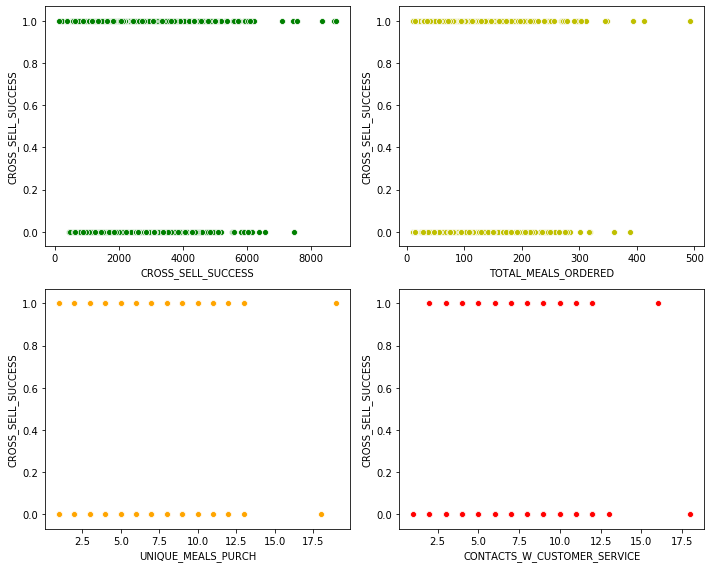

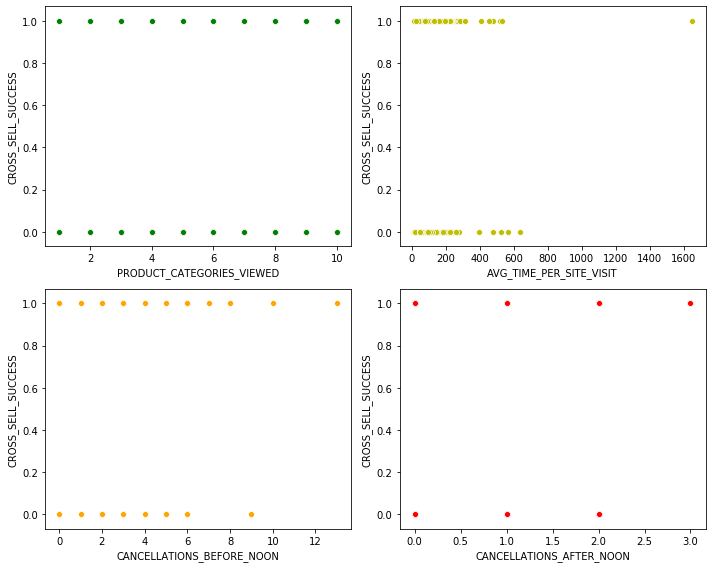

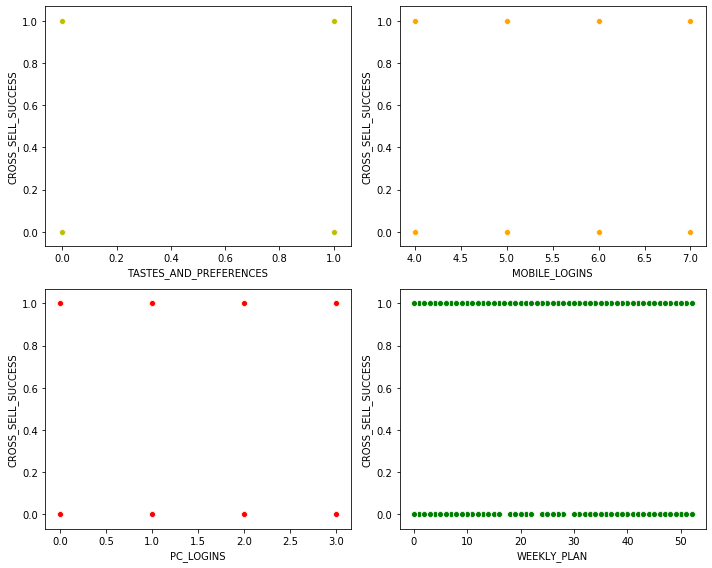

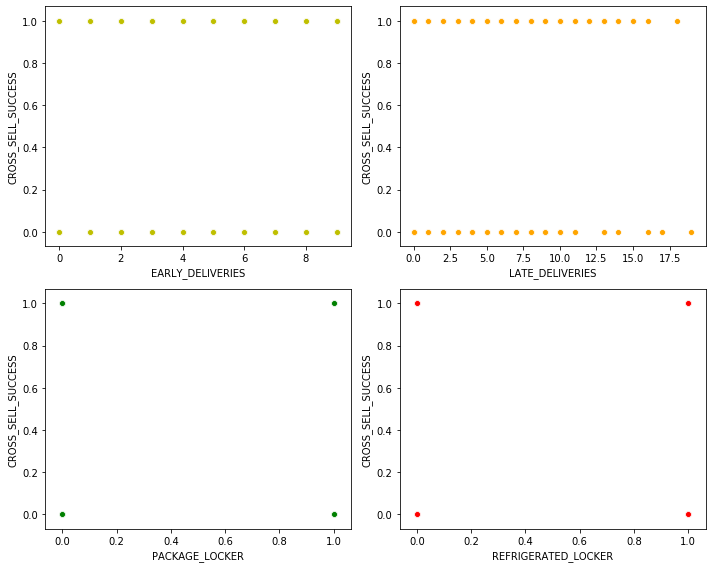

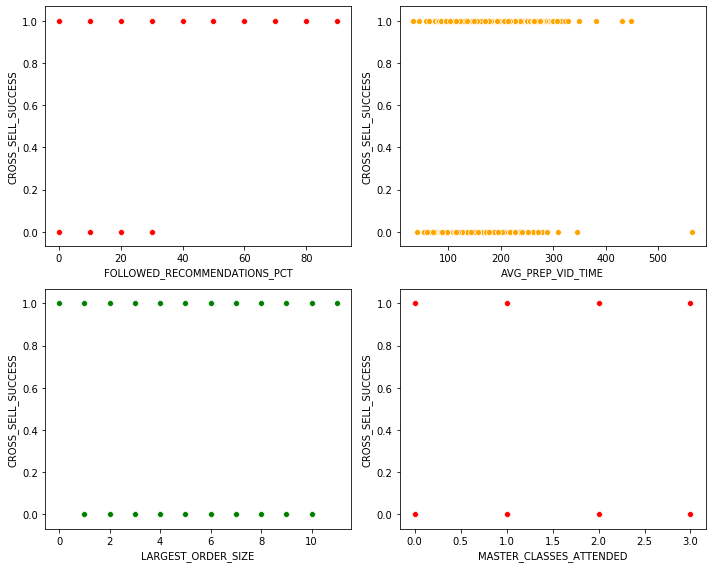

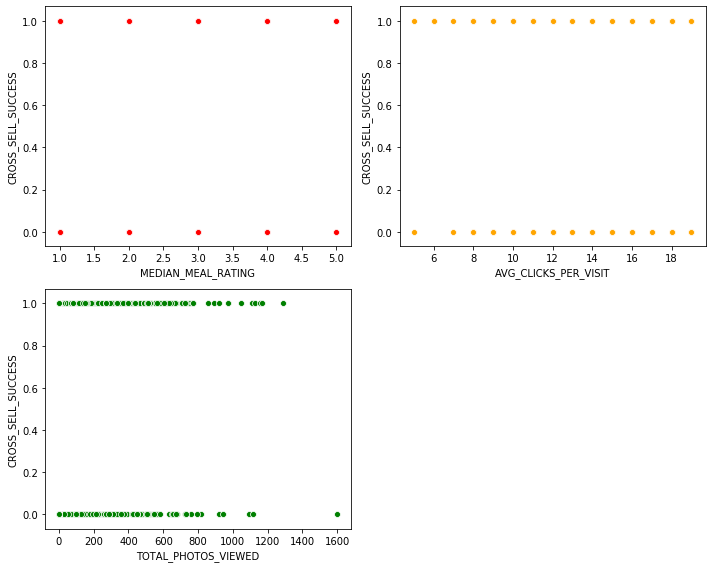

In [145]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['REVENUE'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('chef Data Scatterplots 1 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')
plt.tight_layout()
plt.savefig('chef Data Scatterplots 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['TASTES_AND_PREFERENCES'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['MOBILE_LOGINS'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['PC_LOGINS'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('PC_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
plt.savefig('chef Data Scatterplots 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['EARLY_DELIVERIES'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('LATE_DELIVERIES')

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['PACKAGE_LOCKER'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('PACKAGE_LOCKER')

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['REFRIGERATED_LOCKER'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

plt.tight_layout()
plt.savefig('chef Data Scatterplots 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = chef['CROSS_SELL_SUCCESS'],
               color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['MASTER_CLASSES_ATTENDED'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

plt.tight_layout()
plt.savefig('chef Data Scatterplots 5 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['MEDIAN_MEAL_RATING'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')
########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

plt.tight_layout()
plt.savefig('chef Data Scatterplots 6 of 6.png')
plt.show()

In [146]:
#Total Meals Ordered Scatter
FOLLOWED_RECOMMENDATIONS_PCT_scat_out = 30

chef['FOLLOWED_RECOMMENDATIONS_PCT_scat_out'] = 0
FOLLOWED_RECOMMENDATIONS_PCT_scat_condition_split = chef.loc[: , 'FOLLOWED_RECOMMENDATIONS_PCT_scat_out'][chef['FOLLOWED_RECOMMENDATIONS_PCT']>=FOLLOWED_RECOMMENDATIONS_PCT_scat_out]
chef['FOLLOWED_RECOMMENDATIONS_PCT_scat_out'].replace(to_replace = FOLLOWED_RECOMMENDATIONS_PCT_scat_condition_split,
                            value = 1,
                           inplace = True)


-------------------------------------------------------------------------------------------------------------------------

We start our classification analyses by looking at correlations first. We find no strong correlations between the
features and sucess in cross-selling.

-------------------------------------------------------------------------------------------------------------------------

In [147]:
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with Revenue
print(df_corr.loc[:, 'CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                       1.00
FOLLOWED_RECOMMENDATIONS_PCT             0.46
FOLLOWED_RECOMMENDATIONS_PCT_scat_out    0.40
professional                             0.19
CANCELLATIONS_BEFORE_NOON                0.16
MOBILE_NUMBER                            0.10
TASTES_AND_PREFERENCES                   0.08
REFRIGERATED_LOCKER                      0.07
out_canc_before_noon                     0.06
out_AVG_PREP_VID_TIME                    0.05
CONTACTS_W_CUSTOMER_SERVICE              0.04
MOBILE_LOGINS                            0.04
PACKAGE_LOCKER                           0.04
MASTER_CLASSES_ATTENDED                  0.04
personal                                 0.04
AVG_PREP_VID_TIME                        0.03
MEDIAN_MEAL_RATING                       0.03
out_MEDIAN_MEAL_RATING                   0.03
LARGEST_ORDER_SIZE                       0.02
out_LATE_DELIVERIES                      0.02
out_CANCELLATIONS_AFTER_NOON             0.02
EARLY_DELIVERIES                  

In [148]:
#Printing values to run logistic regression in Statsmodel

for val in chef:
    print(f"chef['{val}'] + ")

chef['Unnamed: 0'] + 
chef['REVENUE'] + 
chef['CROSS_SELL_SUCCESS'] + 
chef['NAME'] + 
chef['EMAIL'] + 
chef['FIRST_NAME'] + 
chef['FAMILY_NAME'] + 
chef['TOTAL_MEALS_ORDERED'] + 
chef['UNIQUE_MEALS_PURCH'] + 
chef['CONTACTS_W_CUSTOMER_SERVICE'] + 
chef['PRODUCT_CATEGORIES_VIEWED'] + 
chef['AVG_TIME_PER_SITE_VISIT'] + 
chef['MOBILE_NUMBER'] + 
chef['CANCELLATIONS_BEFORE_NOON'] + 
chef['CANCELLATIONS_AFTER_NOON'] + 
chef['TASTES_AND_PREFERENCES'] + 
chef['MOBILE_LOGINS'] + 
chef['PC_LOGINS'] + 
chef['WEEKLY_PLAN'] + 
chef['EARLY_DELIVERIES'] + 
chef['LATE_DELIVERIES'] + 
chef['PACKAGE_LOCKER'] + 
chef['REFRIGERATED_LOCKER'] + 
chef['FOLLOWED_RECOMMENDATIONS_PCT'] + 
chef['AVG_PREP_VID_TIME'] + 
chef['LARGEST_ORDER_SIZE'] + 
chef['MASTER_CLASSES_ATTENDED'] + 
chef['MEDIAN_MEAL_RATING'] + 
chef['AVG_CLICKS_PER_VISIT'] + 
chef['TOTAL_PHOTOS_VIEWED'] + 
chef['personal_email_domain'] + 
chef['email_groups'] + 
chef['junk'] + 
chef['personal'] + 
chef['professional'] + 
chef['out_revenue'] + 

In [149]:
# building a full model

# blueprinting a model type
lm_full = smf.logit(formula = """chef['CROSS_SELL_SUCCESS'] ~  
                                chef['MOBILE_NUMBER'] + 
                                chef['CANCELLATIONS_BEFORE_NOON'] + 
                                chef['CANCELLATIONS_AFTER_NOON'] + 
                                chef['TASTES_AND_PREFERENCES'] + 
                                chef['MOBILE_LOGINS'] + 
                                chef['PC_LOGINS'] + 
                                chef['REFRIGERATED_LOCKER'] + 
                                chef['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                chef['out_meals_ordered'] + 
                                chef['out_customer_service_contact'] +
                                chef['out_AVG_PREP_VID_TIME'] +
                                chef['FOLLOWED_RECOMMENDATIONS_PCT_scat_out']""",
                                 data = chef)

#chef['TOTAL_MEALS_ORDERED'] + chef['REVENUE'] + chef['CONTACTS_W_CUSTOMER_SERVICE'] +

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.468401
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     chef['CROSS_SELL_SUCCESS']   No. Observations:                 1946
Model:                                  Logit   Df Residuals:                     1933
Method:                                   MLE   Df Model:                           12
Date:                        Wed, 05 Feb 2020   Pseudo R-squ.:                  0.2538
Time:                                23:12:06   Log-Likelihood:                -911.51
converged:                               True   LL-Null:                       -1221.6
Covariance Type:                    nonrobust   LLR p-value:                5.173e-125
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -2.8560      0.609     -4.687      0.000      -4.050      -1.662
chef['MOBILE_NUMBER']                             0.6703      0.170      3.953      0.000       0.338       1.003
chef['CANCELLATIONS_BEFORE_NOON']                 0.2510      0.042      5.985      0.000       0.169       0.333
chef['CANCELLATIONS_AFTER_NOON']                 -0.2545      0.129     -1.974      0.048      -0.507      -0.002
chef['TASTES_AND_PREFERENCES']                    0.4752      0.125      3.804      0.000       0.230       0.720
chef['MOBILE_LOGINS']                             0.2054      0.099      2.083      0.037       0.012       0.399
chef['PC_LOGINS']                                -0.2707      0.108     -2.504      0.012      -0.483      -0.059
chef['REFRIGERATED_LOCKER']                       0.4544      0.197      2.312      0.021       0.069       0.840
chef['FOLLOWED_RECOMMENDATIONS_PCT']              0.0687      0.006     12.114      0.000       0.058       0.080
chef['out_meals_ordered']                        -0.6012      0.294     -2.047      0.041      -1.177      -0.026
chef['out_customer_service_contact']             -0.2830      0.185     -1.526      0.127      -0.646       0.080
chef['out_AVG_PREP_VID_TIME']                     0.9117      0.328      2.781      0.005       0.269       1.554
chef['FOLLOWED_RECOMMENDATIONS_PCT_scat_out']    -0.6022      0.203     -2.966      0.003      -1.000      -0.204
=================================================================================================================
"""

-------------------------------------------------------------------------------------------------------------------------

After removing all the non-significant variables, we have our final list of significant features and variables.

-------------------------------------------------------------------------------------------------------------------------

In [150]:
# applying modelin scikit-learn

# preparing x-variables
chef_data = ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON', 
            'TASTES_AND_PREFERENCES','MOBILE_LOGINS','PC_LOGINS','REFRIGERATED_LOCKER', 
            'FOLLOWED_RECOMMENDATIONS_PCT','out_meals_ordered','out_customer_service_contact',
            'out_AVG_PREP_VID_TIME','FOLLOWED_RECOMMENDATIONS_PCT_scat_out']


# preparing response variable
chef_target = ['CROSS_SELL_SUCCESS']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(chef[chef_data],
                                                    chef[chef_target],
                                                    test_size=0.25, 
                                                    random_state=222)

-------------------------------------------------------------------------------------------------------------------------

<b>Now we start running models.</b> <br>

<u> The model strategy is as follows: </u><br>
<br>
1. Start by running a simple logistic regression.<br>
2. Run the model through multiple classification models and observe the scores.<br>
3. Pick the most stable score models and try to optimize them (by running hyperparameter tuning)<br>
4. Compare the different scores and observe the best model.
-------------------------------------------------------------------------------------------------------------------------

In [151]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

logreg_train_score = logreg_fit.score(X_train, y_train).round(4)
logreg_test_score = logreg_fit.score(X_test, y_test).round(4)
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4)

Training ACCURACY: 0.732
Testing  ACCURACY: 0.6797
AUC Score        : 0.5086


C:\python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Using the<a href="hhttps://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html"> scikit-learn Documentation </a> on classifier comparison, we shortlist our classifiers <b>to get insights from a diverse range of decision boundaries.</b>

<u> We select the following: </u><br>
<br>
1. KNeighborsClassifier<br>
2.  SVC.<br>
3. GaussianProcessClassifier<br>
4. DecisionTreeClassifier<br>
5. RandomForestClassifier<br>
6. MLPClassifier (Neural Network)<br>
7. AdaBoostClassifier<br>
8. GaussianNB<br>
9. QuadraticDiscriminantAnalysis<br>


In [152]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [153]:
#Creating a list of classifiers

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025, random_state = 222),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5, random_state = 222),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state = 222),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 222),
#     AdaBoostClassifier(random_state = 222),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()]

# for i in classifiers:
#     # INSTANTIATING a logistic regression model
#     model = i
    
#     # FITTING the training data
#     model_fit = model.fit(X_train, y_train)


#     # PREDICTING based on the testing set
#     model_pred = model_fit.predict(X_test)


#     # SCORING the results
#     print(f"""{i} Training ACCURACY:
#     """, model_fit.score(X_train, y_train).round(4))
    
    
#     print(f"""{i} Testing  ACCURACY:
#     """, model_fit.score(X_test, y_test).round(4))

<u> We shortlist the following based on their training-testing scores for further tunning using hyperparameters: </u><br>
<br>
1. KNeighborsClassifier [Training Score: <b>0.7724</b> and Testing Score: <b>0.5749</b>]<br>
2. DecisionTreeClassifier [Training Score: <b>0.6991</b> and Testing Score: <b>0.6632]</b><br>
3. MLPClassifier (Neural Network) [Training Score: <b>0.6785</b> and Testing Score: <b>0.6797</b>]<br>

In [154]:
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

## Decision Tree Classifier

In [155]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_leaf = 20,
                                   criterion = 'gini',
                                   splitter = 'best',
                                  random_state = 222)


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

dtc_train_score = full_tree_fit.score(X_train, y_train).round(4)
dtc_test_score = full_tree_fit.score(X_test, y_test).round(4)
dtc_auc_score = roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4)

Training ACCURACY: 0.782
Testing  ACCURACY: 0.7844
AUC Score        : 0.7573


In [156]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

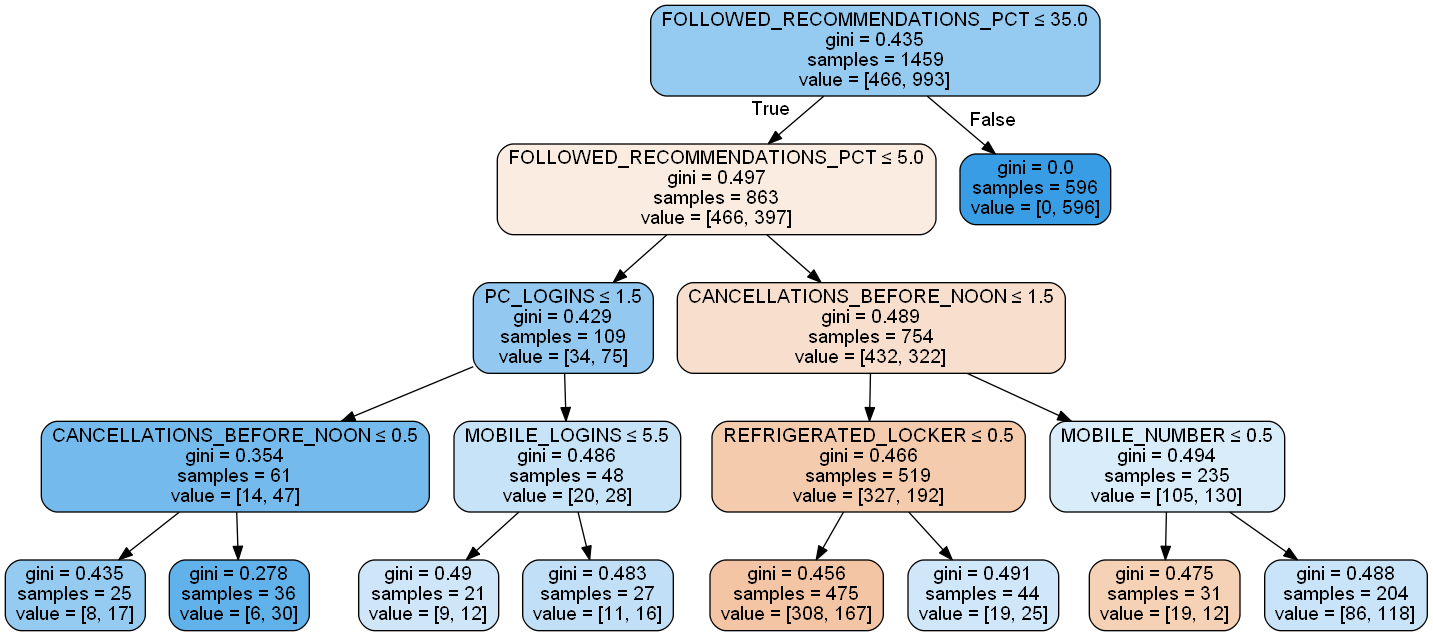

In [157]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = X_train)

## K-Nearest Neighbor 

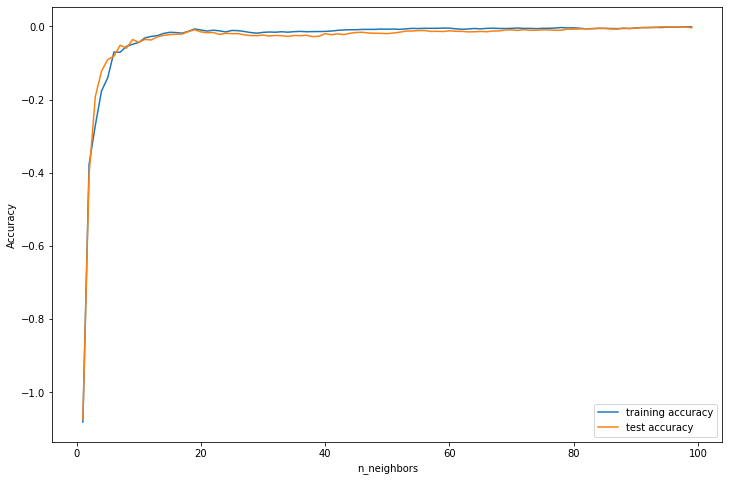

In [158]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 100)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_scaled, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [159]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 94


In [160]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef[chef_data])


# TRANSFORMING the data
X_scaled     = scaler.transform(chef[chef_data])


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled_df,
            chef[chef_target],
            random_state = 222,
            test_size = 0.25,
            stratify = chef[chef_target])


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 87)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)

# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

knn_train_score = knn_fit.score(X_train_scaled, y_train).round(4)
knn_test_score = knn_fit.score(X_test_scaled, y_test).round(4)
knn_auc_score = roc_auc_score(y_true  = y_test, y_score = knn_pred).round(4)


C:\python\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training ACCURACY: 0.7334
Testing  ACCURACY: 0.7454
AUC Score        : 0.672


# Neural Network
<br>
<br>
Neural Networks can prove to be very promising. We didn't find satisfactory results from the earlier classifiers.<br>
This method has the potential to attach weights in a number of combinations using 'layers' of of neural units and optimize the overall predictions.

In [161]:
#Hyperparameter Tuning for Neural Network

# mlp = MLPClassifier(random_state=222)

# param_grid = {
#     'hidden_layer_sizes': [(3,3),(5,2),(2,2),(3,),(5,),(2),(100,)]
# }

# # GridSearchCV object
# mlp_cv = GridSearchCV(estimator  = mlp,
#                              param_grid = param_grid,
#                              cv         = 3,
#                              scoring    = make_scorer(roc_auc_score,
#                                                       needs_threshold = False))

# # FITTING to the FULL DATASET (due to cross-validation)
# mlp_cv.fit(X_train_scaled,y_train)


# # PREDICT step is not needed

# # printing the optimal parameters and best score
# print("Tuned Parameters  :", mlp_cv.best_params_)
# print("Tuned Training AUC:", mlp_cv.best_score_.round(4))


In [162]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef[chef_data])


# TRANSFORMING the data
X_scaled     = scaler.transform(chef[chef_data])


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled_df,
            chef[chef_target],
            random_state = 222,
            test_size = 0.25,
            stratify = chef[chef_target])

#Neural Network

#Instantiating
clf = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=222) #solver='lbfgs', alpha=1e-5,
                   

#Fitting
clf_fit = clf.fit(X_train_scaled,y_train)

#Predicting
clf_predict = clf.predict (X_test_scaled)

print('Training ACCURACY:', clf_fit.score(X_train_scaled, y_train).round(4))
print('Testing  ACCURACY:', clf_fit.score(X_test_scaled, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = clf_predict).round(4))

clf_train_score = clf_fit.score(X_train_scaled, y_train).round(4)
clf_test_score = clf_fit.score(X_test_scaled, y_test).round(4)
clf_auc_score = roc_auc_score(y_true  = y_test,
                                          y_score = clf_predict).round(4)


C:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training ACCURACY: 0.7793
Testing  ACCURACY: 0.7125
AUC Score        : 0.7241


C:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [163]:
# comparing results

print(f"""
    Model             Train Score     Test Score      AUC Score
----------------      ---------     ----------       ----------
Logreg               {logreg_train_score}             {logreg_test_score}           {logreg_auc_score}
DTC                  {dtc_train_score}             {dtc_test_score}           {dtc_auc_score}
KNN                  {knn_train_score}             {knn_test_score}           {knn_auc_score}
Neural Network       {clf_train_score}             {clf_test_score}           {clf_auc_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['Logreg', 'DTC', 'KNN', 'Neural Network'],
           
                     'Training' : [logreg_train_score, dtc_train_score, knn_train_score,
                                   clf_train_score],
           
                     'Testing'  : [logreg_test_score, dtc_test_score, knn_test_score,
                                   clf_test_score],
                    
                     'AUC_Score' : [logreg_auc_score, dtc_auc_score, knn_auc_score,
                                  clf_auc_score]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('all_model_performance.xlsx',
                           index = False)


    Model             Train Score     Test Score      AUC Score
----------------      ---------     ----------       ----------
Logreg               0.732             0.6797           0.5086
DTC                  0.782             0.7844           0.7573
KNN                  0.7334             0.7454           0.672
Neural Network       0.7793             0.7125           0.7241



# Conclusion

We find that the Neural Network and KNN predicts with the acceptable scores. However, the area under the curve is higher for the Neural Network. Hence, our <b>recommended model is the Neural Network.</b>